In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

In [ ]:
dataset = pd.read_csv('AirPassengers.csv')
#parse string to datetime type
dataset['Month'] = pd.to_datetime(dataset['Month'],infer_datetime_format=True)
IndexedDataset = dataset.set_index(['Month'])

In [ ]:
from datetime import datetime
IndexedDataset.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


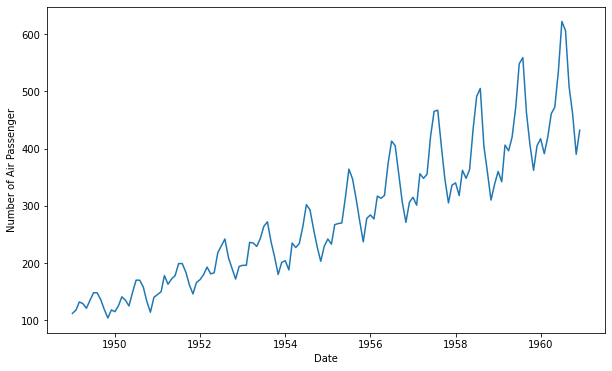

In [ ]:
plt.xlabel('Date')
plt.ylabel('Number of Air Passenger')
plt.plot(IndexedDataset)

In [ ]:
#determinin rolling statistics

rolmean = IndexedDataset.rolling(window=12).mean()

rolstd = IndexedDataset.rolling(window=12).std()

print(rolmean,rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


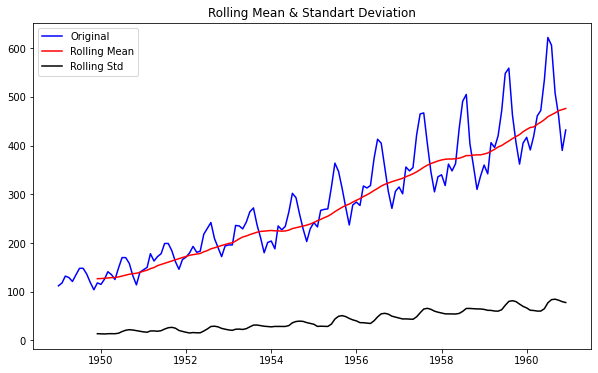

In [ ]:
#plot rolling statistics

orig=plt.plot(IndexedDataset,color='blue',label='Original')
mean=plt.plot(rolmean,color='red',label='Rolling Mean')
std = plt.plot(rolstd,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standart Deviation')
plt.show(block=False)

In [ ]:
#perform Dickey-Fuller test:

from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test:')
dftest=adfuller(IndexedDataset['#Passengers'],autolag='AIC')

dfoutput= pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)'%key]= value

print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


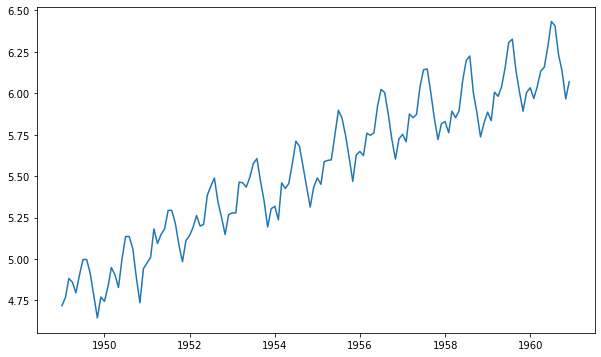

In [ ]:
#Estimating trend

IndexedDataset_logScale = np.log(IndexedDataset)

plt.plot(IndexedDataset_logScale)

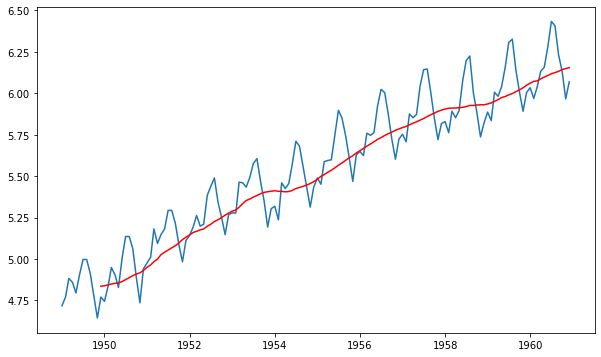

In [ ]:
movingAverage = IndexedDataset_logScale.rolling(window=12).mean()

movingSTD = IndexedDataset_logScale.rolling(window=12).mean()

plt.plot(IndexedDataset_logScale)

plt.plot(movingAverage,color='Red')

In [ ]:
datasetLogScaleMinusMovingAverage = IndexedDataset_logScale-movingAverage

datasetLogScaleMinusMovingAverage.head()


#Remove Non Values

datasetLogScaleMinusMovingAverage.dropna(inplace=True)

datasetLogScaleMinusMovingAverage.head(20)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
  #determing rolling statistics
  movingAverage = timeseries.rolling(window=12).mean()
  movingSTD = timeseries.rolling(window=12).std()

  #plot rolling statistics
  orig=plt.plot(timeseries,color='blue',label='Original')
  mean=plt.plot(movingAverage,color='red',label='Rolling Mean')
  std = plt.plot(movingSTD,color='black',label='Rolling Std')
  plt.legend(loc='best')
  plt.title('Rolling Mean & Standart Deviation')
  plt.show(block=False)

  #perform Dickey-Fuller Test

  print('Results of Dickey-Fuller Test:')
  dftest=adfuller(timeseries['#Passengers'],autolag='AIC')
  dfoutput= pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]= value
  print(dfoutput)



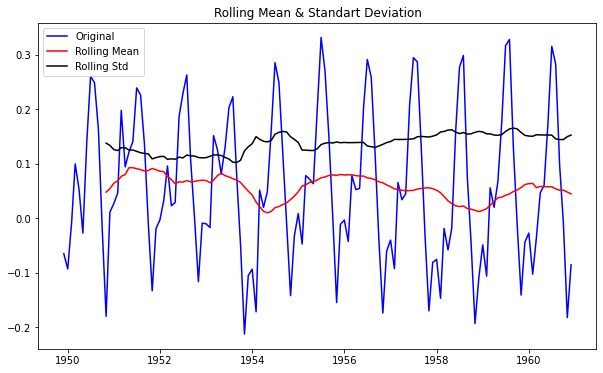

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [ ]:
test_stationarity(datasetLogScaleMinusMovingAverage)

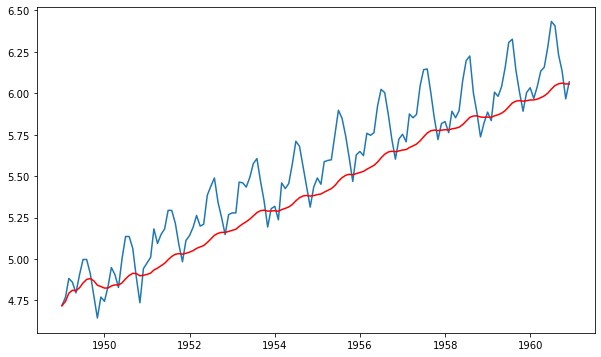

In [ ]:
exponentialDecayWeightedAverage = IndexedDataset_logScale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(IndexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage,color='red')

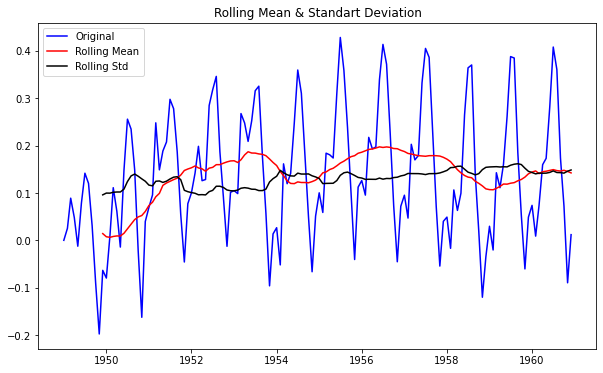

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64
